In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
def extract_arch(model):
    vit, size, patch_size, *rest = model.split("-")
    return vit+"-"+size+"-"+patch_size

In [57]:
dataset_type = pd.read_csv("dataset_type.csv").set_index("dataset")["type"].to_dict()
df = pd.read_csv("benchmark.csv")
vtab_plus = list(map(lambda s:s.strip(), open("datasets.txt").readlines()))
df = df[df.dataset.isin(vtab_plus)]
df.loc[:, "dataset_type"] = df.dataset.apply(lambda d:dataset_type[d])
df.loc[:, "model_arch"] = df.model.apply(extract_arch)

In [58]:
df_retrieval = df[df["dataset_type"] == "retrieval"]
df = df[df["dataset_type"] != "retrieval"]
df = df.drop(["image_retrieval_recall@5", "text_retrieval_recall@5"], axis=1)
dataset_type = {k:v for k,v in dataset_type.items() if v != "retrieval"}

# Accuracy of all models on all datasets

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

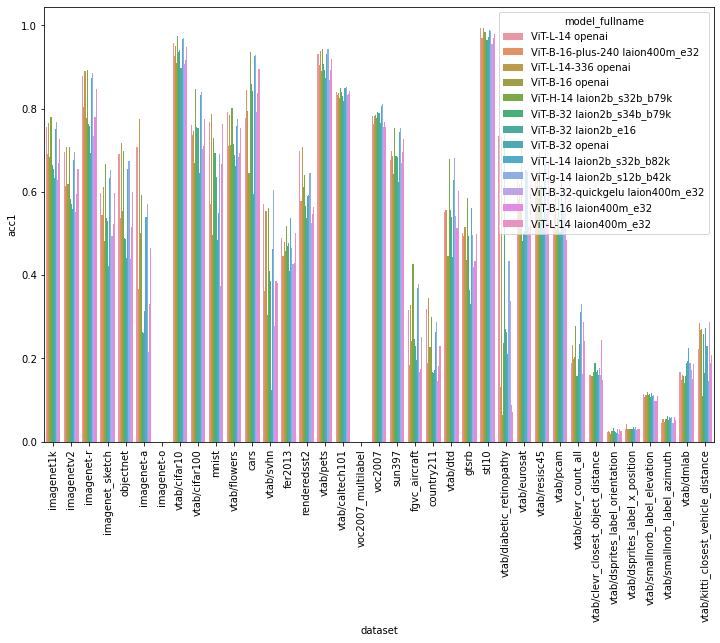

In [59]:
fig = plt.figure(figsize=(12,8))
#order = df.sort_values(by="dataset_type").dataset.unique()
order = list(dataset_type.keys())
ax = sns.barplot(
    x="dataset", y="acc1", 
    data=df,
    order=order,
    hue="model_fullname"
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Zooming on a specific architecture

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

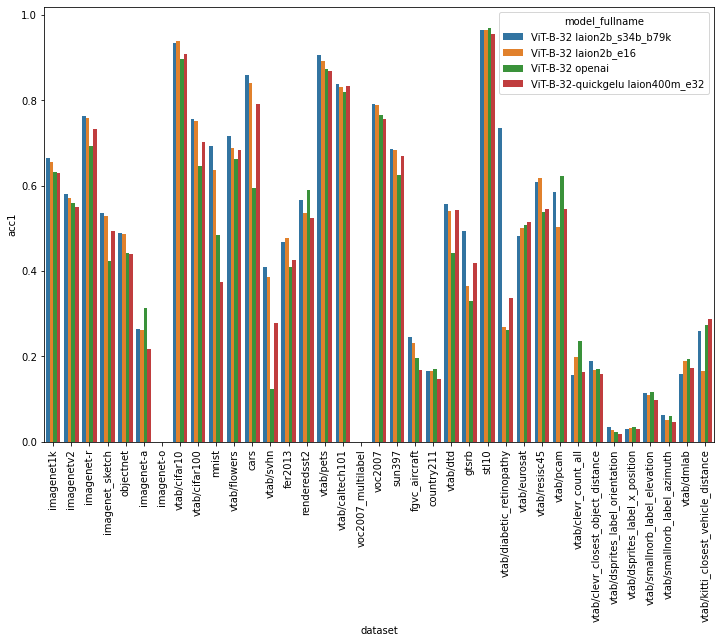

In [40]:
fig = plt.figure(figsize=(12,8))
order = list(dataset_type.keys())
d = df[df.model_arch=="ViT-B-32"]
ax = sns.barplot(
    x="dataset", y="acc1", 
    data=d,
    order=order,
    hue="model_fullname"
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Accuracy averaged over all models for each dataset

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

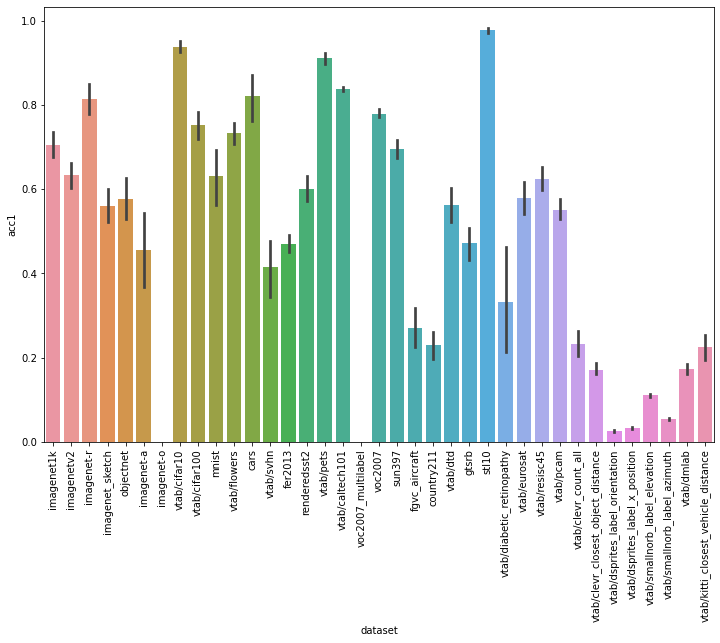

In [42]:
fig = plt.figure(figsize=(12,8))
order = list(dataset_type.keys())
ax = sns.barplot(
    x="dataset", y="acc1", data=df,
    order=order
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Grouping over architecture for each dataset

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

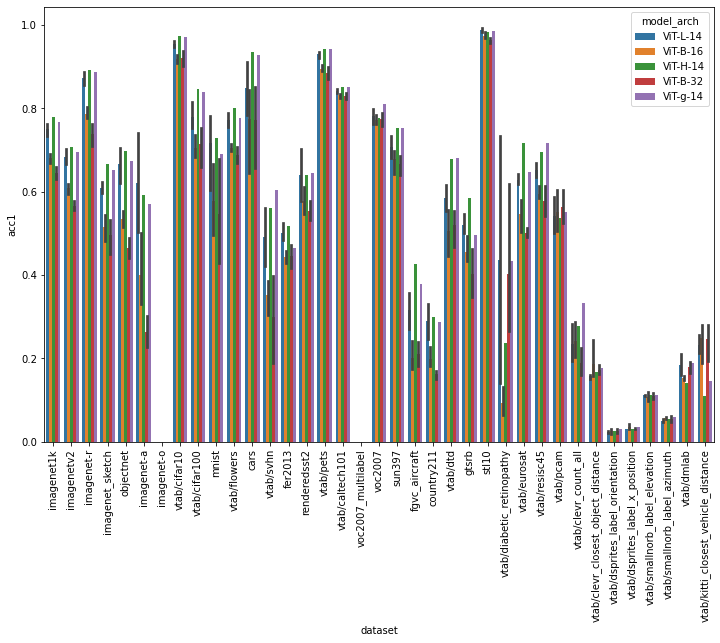

In [43]:
fig = plt.figure(figsize=(12,8))
order = list(dataset_type.keys())
ax = sns.barplot(
    x="dataset", y="acc1", 
    data=df,
    order=order,
    hue="model_arch"
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Grouping over pre-training data source

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

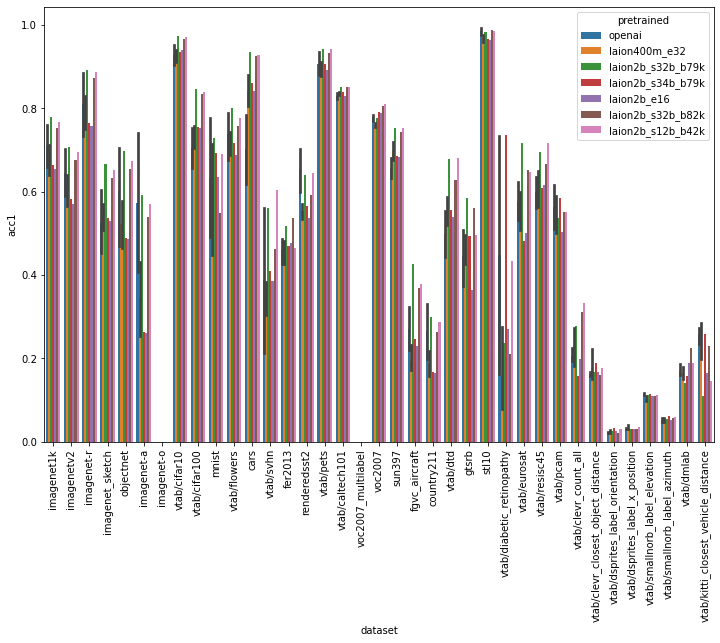

In [44]:
fig = plt.figure(figsize=(12,8))
order = list(dataset_type.keys())
d = df.copy()
ax = sns.barplot(
    x="dataset", y="acc1", 
    data=d,
    order=order,
    hue="pretrained"
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Best results from each pre-training source

<AxesSubplot:xlabel='dataset', ylabel='acc1'>

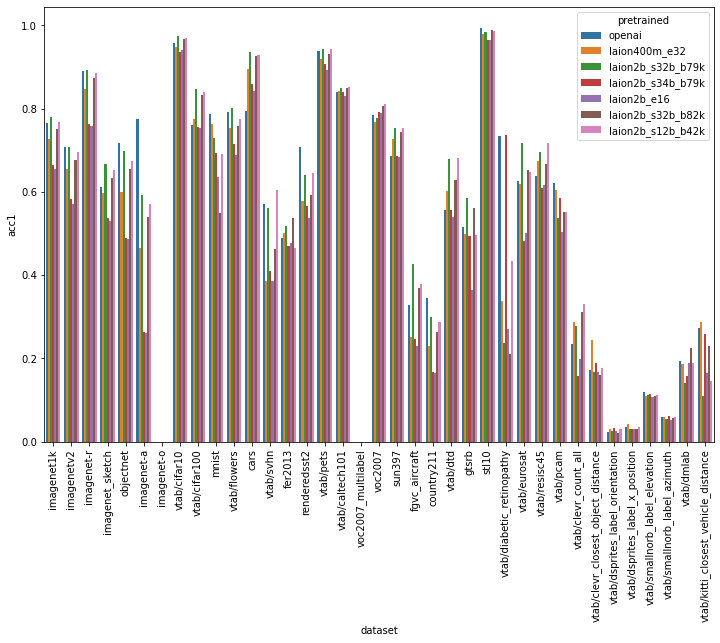

In [45]:
fig = plt.figure(figsize=(12,8))
order = list(dataset_type.keys())
d = df.copy()
ax = sns.barplot(
    x="dataset", y="acc1", 
    data=d,
    order=order,
    hue="pretrained",
    estimator=np.max,
    ci=None
)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

# Detailed results

### All results (acc1)

In [46]:
metric = "acc1"
df_metric = pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()
df_metric

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
cars,0.837,0.645,0.844,0.842,0.860,0.594,0.792,0.935,0.926,0.896,0.777,0.793,0.928
country211,0.181,0.228,0.188,0.165,0.166,0.172,0.147,0.300,0.264,0.231,0.318,0.345,0.287
fer2013,0.429,0.458,0.446,0.477,0.469,0.409,0.427,0.518,0.537,0.501,0.490,0.480,0.466
fgvc_aircraft,0.175,0.242,0.185,0.230,0.246,0.197,0.168,0.428,0.369,0.251,0.317,0.329,0.378
gtsrb,0.435,0.436,0.495,0.365,0.493,0.331,0.420,0.584,0.561,0.500,0.502,0.516,0.497
imagenet-a,0.332,0.501,0.368,0.262,0.263,0.314,0.217,0.592,0.539,0.466,0.707,0.774,0.571
imagenet-r,0.779,0.777,0.804,0.759,0.764,0.693,0.734,0.893,0.874,0.848,0.879,0.891,0.886
imagenet1k,0.670,0.684,0.691,0.655,0.665,0.633,0.629,0.780,0.752,0.727,0.755,0.765,0.767
imagenet_sketch,0.523,0.481,0.544,0.529,0.536,0.423,0.493,0.666,0.633,0.596,0.596,0.611,0.652


In [47]:
metric = "mean_per_class_recall"
df_metric = pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()
df_metric

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
cars,0.838,0.647,0.846,0.844,0.862,0.597,0.793,0.935,0.926,0.896,0.777,0.793,0.929
country211,0.182,0.228,0.188,0.164,0.167,0.171,0.147,0.299,0.263,0.231,0.318,0.345,0.288
fer2013,0.392,0.417,0.394,0.465,0.433,0.359,0.399,0.506,0.534,0.450,0.489,0.491,0.481
fgvc_aircraft,0.175,0.241,0.188,0.232,0.246,0.197,0.166,0.426,0.365,0.248,0.317,0.332,0.378
gtsrb,0.401,0.370,0.432,0.351,0.435,0.320,0.393,0.544,0.517,0.450,0.439,0.447,0.466
imagenet-a,0.341,0.483,0.381,0.284,0.279,0.324,0.235,0.581,0.536,0.473,0.675,0.735,0.564
imagenet-r,0.764,0.761,0.791,0.744,0.752,0.679,0.721,0.880,0.860,0.833,0.865,0.878,0.875
imagenet1k,0.670,0.684,0.692,0.656,0.665,0.633,0.629,0.780,0.753,0.727,0.754,0.766,0.767
imagenet_sketch,0.523,0.482,0.545,0.529,0.537,0.423,0.494,0.666,0.633,0.596,0.596,0.610,0.652


### Imagenet robustness results (acc1)

In [48]:
# Imagenet robustness results
metric = "acc1"
df_metric = pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()
df_metric[(df_metric.index.str.startswith("imagenet")) | (df_metric.index=="objectnet")]

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
imagenet-a,0.332,0.501,0.368,0.262,0.263,0.314,0.217,0.592,0.539,0.466,0.707,0.774,0.571
imagenet-r,0.779,0.777,0.804,0.759,0.764,0.693,0.734,0.893,0.874,0.848,0.879,0.891,0.886
imagenet1k,0.670,0.684,0.691,0.655,0.665,0.633,0.629,0.780,0.752,0.727,0.755,0.765,0.767
imagenet_sketch,0.523,0.481,0.544,0.529,0.536,0.423,0.493,0.666,0.633,0.596,0.596,0.611,0.652
imagenetv2,0.596,0.619,0.614,0.572,0.582,0.560,0.551,0.708,0.677,0.656,0.697,0.707,0.696
objectnet,0.515,0.554,0.538,0.488,0.490,0.442,0.439,0.697,0.655,0.599,0.691,0.718,0.675


# Robustness plot

Here, following "Measuring Robustness to Natural Distribution Shifts
in Image Classification" (https://arxiv.org/pdf/2007.00644.pdf, https://share.streamlit.io/modestyachts/imagenet-testbed-website/main/website.py),
we show  the deviation from the line fit of (x=imagenet1k accuracy, y=imagenetv2/imagenet-1/imagenet_sketch) which was used
to measure robustnest improvements separately from accuracy improvements in imagenet1k, as the two are correlated.

In the plot below, deviation from the line are improvements in robustness.

No handles with labels found to put in legend.


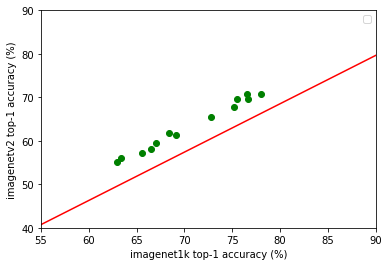

In [49]:
df_metric = pd.pivot(df, index="model_fullname", columns="dataset", values="acc1").T.dropna()
dataset = "imagenetv2"
line_fits_data = {
    # slopes and intercepts from https://share.streamlit.io/modestyachts/imagenet-testbed-website/main/website.py
    "imagenetv2": (1.112, -20.433),
    "imagenet-r": (1.549, -104.556),
    "imagenet_sketch": (0.931, -45.373)
}
x=np.linspace(0, 100,100)
slope, intercept = line_fits_data[dataset]
y=x*slope+intercept
plt.xlim(55,90)
plt.ylim(40,90)
d = df_metric.T[["imagenet1k", dataset]]*100
plt.scatter(d["imagenet1k"], d[dataset], color="green")
plt.plot(x,y, color="red")
plt.xlabel("imagenet1k top-1 accuracy (%)")
plt.ylabel(f"{dataset} top-1 accuracy (%)")
plt.legend()

### All results (mean_per_class_recall)

In [50]:
metric = "mean_per_class_recall"
pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
cars,0.838,0.647,0.846,0.844,0.862,0.597,0.793,0.935,0.926,0.896,0.777,0.793,0.929
country211,0.182,0.228,0.188,0.164,0.167,0.171,0.147,0.299,0.263,0.231,0.318,0.345,0.288
fer2013,0.392,0.417,0.394,0.465,0.433,0.359,0.399,0.506,0.534,0.450,0.489,0.491,0.481
fgvc_aircraft,0.175,0.241,0.188,0.232,0.246,0.197,0.166,0.426,0.365,0.248,0.317,0.332,0.378
gtsrb,0.401,0.370,0.432,0.351,0.435,0.320,0.393,0.544,0.517,0.450,0.439,0.447,0.466
imagenet-a,0.341,0.483,0.381,0.284,0.279,0.324,0.235,0.581,0.536,0.473,0.675,0.735,0.564
imagenet-r,0.764,0.761,0.791,0.744,0.752,0.679,0.721,0.880,0.860,0.833,0.865,0.878,0.875
imagenet1k,0.670,0.684,0.692,0.656,0.665,0.633,0.629,0.780,0.753,0.727,0.754,0.766,0.767
imagenet_sketch,0.523,0.482,0.545,0.529,0.537,0.423,0.494,0.666,0.633,0.596,0.596,0.610,0.652


### All results (mAP)

In [51]:
# For multi-label classification tasks
metric = "mean_average_precision"
pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
voc2007_multilabel,0.784,0.789,0.785,0.793,0.796,0.760,0.762,0.801,0.820,0.785,0.790,0.804,0.807


## All results (retrieval)

In [52]:
metric = "image_retrieval_recall@5"
pd.pivot(df_retrieval, index="model_fullname", columns="dataset", values=metric).T.dropna()

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
flickr30k,0.882,0.855,0.889,0.881,0.884,0.834,0.855,0.941,0.929,0.908,0.872,0.889,0.935
flickr8k,0.620,0.564,0.644,0.622,0.629,0.532,0.579,0.745,0.712,0.675,0.598,0.627,0.730
mscoco_captions,0.636,0.584,0.662,0.647,0.654,0.558,0.608,0.734,0.711,0.681,0.611,0.616,0.724


In [53]:
metric = "text_retrieval_recall@5"
pd.pivot(df_retrieval, index="model_fullname", columns="dataset", values=metric).T.dropna()

model_fullname,ViT-B-16 laion400m_e32,ViT-B-16 openai,ViT-B-16-plus-240 laion400m_e32,ViT-B-32 laion2b_e16,ViT-B-32 laion2b_s34b_b79k,ViT-B-32 openai,ViT-B-32-quickgelu laion400m_e32,ViT-H-14 laion2b_s32b_b79k,ViT-L-14 laion2b_s32b_b82k,ViT-L-14 laion400m_e32,ViT-L-14 openai,ViT-L-14-336 openai,ViT-g-14 laion2b_s12b_b42k
dataset,,,,,,,,,,,,,
flickr30k,0.968,0.963,0.971,0.964,0.963,0.949,0.941,0.993,0.987,0.978,0.974,0.981,0.991
flickr8k,0.767,0.728,0.792,0.761,0.778,0.699,0.739,0.856,0.822,0.806,0.766,0.780,0.846
mscoco_captions,0.796,0.768,0.810,0.795,0.798,0.748,0.768,0.860,0.840,0.822,0.792,0.810,0.854


## Aggregating over datasets

See VTAB (https://arxiv.org/pdf/1910.04867.pdf, Section E) for a discussion about different aggregation 
strategies and how much they correlate. They find that all aggregation strategies have high
Kendall score with the simple top-1 mean accuracy over datasets.

### Ranking the models over mean top-1 accuracy over all datasets

In [54]:
df.groupby("model_fullname").agg(['mean', 'std', 'median']).sort_values(by=("acc1", "mean"), ascending=False)

acc1        ... mean_average_precision       
                                  mean   std  ...                    std median
model_fullname                                ...                              
ViT-L-14-336 openai              0.567 0.287  ...                    NaN  0.804
ViT-g-14 laion2b_s12b_b42k       0.565 0.290  ...                    NaN  0.807
ViT-H-14 laion2b_s32b_b79k       0.564 0.301  ...                    NaN  0.801
ViT-L-14 openai                  0.558 0.286  ...                    NaN  0.790
ViT-L-14 laion2b_s32b_b82k       0.546 0.288  ...                    NaN  0.820
ViT-L-14 laion400m_e32           0.518 0.296  ...                    NaN  0.785
ViT-B-32 laion2b_s34b_b79k       0.508 0.281  ...                    NaN  0.796
ViT-B-16-plus-240 laion400m_e32  0.493 0.282  ...                    NaN  0.785
ViT-B-16 laion400m_e32           0.484 0.280  ...                    NaN  0.784
ViT-B-32 laion2b_e16             0.481 0.280  ...                    NaN  0.793
ViT-B-16 openai                  0.475 0.273  ...                    NaN  0.789
ViT-B-32-quickgelu laion400m_e32 0.458 0.272  ...                    NaN  0.762
ViT-B-32 openai                  0.449 0.262  ...                    NaN  0.760

[13 rows x 12 columns]

### Compute rank of the model for each dataset (1 = best, lower is better), then average the ranks over the datasets

In [55]:
metric = "acc1"
df_metric = pd.pivot(df, index="model_fullname", columns="dataset", values=metric).T.dropna()
df_metric.rank(axis=1,ascending=False).agg(["mean", "std"]).T.sort_values(by="mean",ascending=True)

,mean,std
model_fullname,,
ViT-g-14 laion2b_s12b_b42k,3.286,2.295
ViT-H-14 laion2b_s32b_b79k,3.786,3.355
ViT-L-14 laion2b_s32b_b82k,4.529,2.440
ViT-L-14-336 openai,4.871,3.037
ViT-L-14 openai,5.343,3.038
ViT-L-14 laion400m_e32,6.829,2.925
ViT-B-32 laion2b_s34b_b79k,7.114,3.332
ViT-B-16-plus-240 laion400m_e32,7.971,2.285
ViT-B-16 laion400m_e32,8.543,2.822
